# **Configuración de entorno**

## Creación del punto de montaje

In [1]:
root = '/content/temp_drive'

In [2]:
from google.colab import drive
drive.mount(root, force_remount=True)

Mounted at /content/temp_drive


In [3]:
%cd "{root}/MyDrive/monografia/Codigo"

/content/temp_drive/MyDrive/monografia/Codigo


## Cargue de librerías y funciones

In [4]:
%run 00_configuracion_entorno.ipynb

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import matplotlib
from matplotlib.pyplot import figure
from statsmodels.tsa.arima_model import ARIMA

# **Carga de archivo fuentes**

Se realiza el proceso de carga de los archivos correspondiente a cada moneda de análisis

In [6]:
path = '/content/temp_drive/MyDrive/monografia/Dataset'

tether = pd.read_csv(f"{path}/coin_Tether.csv")
bitcoin = pd.read_csv(f"{path}/coin_Bitcoin.csv")
cardano = pd.read_csv(f"{path}/coin_Cardano.csv")
ethereum = pd.read_csv(f"{path}/coin_Ethereum.csv")
binance = pd.read_csv(f"{path}/coin_BinanceCoin.csv")

# **Análisis Exploratorio**

## **Visualización del Dataset del bitcoin**

In [7]:
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


## **Análisis de la miníma fecha de cada criptomoneda**

Se realiza con el objetivo de poder tomar una fecha de corte similar para todas las monedas y facilitar el analisis del valor de cierre en la misma ventana de tiempo.

In [8]:
print("Miníma Fecha del bitcoin", bitcoin.Date.min())
print("Miníma Fecha del binance", binance.Date.min())
print("Miníma Fecha del cardano", cardano.Date.min())
print("Miníma Fecha del ethereum", ethereum.Date.min())
print("Miníma Fecha del tether", tether.Date.min())

Miníma Fecha del bitcoin 2013-04-29 23:59:59
Miníma Fecha del binance 2017-07-26 23:59:59
Miníma Fecha del cardano 2017-10-02 23:59:59
Miníma Fecha del ethereum 2015-08-08 23:59:59
Miníma Fecha del tether 2015-02-26 23:59:59


In [9]:
bitcoin.Date.max()

'2021-07-06 23:59:59'

Se crea un dataframe vació con las columnas necesarias

In [10]:
df_Coins_Close= df = pd.DataFrame(columns=['bitcoinClose', 'binanceClose', 'cardanoClose','ethereumClose','tetherClose'])

Se inicializan los campos del nuevo dataframe con los valores correspondientes

In [11]:
df_Coins_Close['bitcoinClose'] = bitcoin.Close[bitcoin.Date >= '2017-10-02 23:59:59'].values
df_Coins_Close['binanceClose'] = binance.Close[binance.Date >= '2017-10-02 23:59:59'].values
df_Coins_Close['cardanoClose'] = cardano.Close[cardano.Date >= '2017-10-02 23:59:59'].values
df_Coins_Close['ethereumClose'] = ethereum.Close[ethereum.Date >= '2017-10-02 23:59:59'].values
df_Coins_Close['tetherClose'] = tether.Close[tether.Date >= '2017-10-02 23:59:59'].values

#Se agrega la fecha 
df_Coins_Close['Date'] = pd.to_datetime(cardano['Date']).values

Se formatean los datos como tipo date y se indexa la fecha

In [12]:
df_Coins_Close['Date'] = df_Coins_Close['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_Coins_Close.set_index("Date", inplace=True)

In [13]:
df_Coins_Close.head()

,bitcoinClose,binanceClose,cardanoClose,ethereumClose,tetherClose
Date,,,,,
2017-10-02,4409.319824,1.96467,0.025932,297.475006,1.00170
2017-10-03,4317.479980,1.82070,0.020816,292.463013,1.00012
2017-10-04,4229.359863,1.60148,0.021931,292.657990,1.00125
2017-10-05,4328.410156,1.67849,0.021489,295.863007,1.00030
2017-10-06,4370.810059,1.57991,0.018539,308.588013,1.00109


Se toma la información relevante del dataframe que contiene los precios de cierree cada criptomoneda

In [14]:
df_Coins_Close.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 2017-10-02 to 2021-07-06
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bitcoinClose   1374 non-null   float64
 1   binanceClose   1374 non-null   float64
 2   cardanoClose   1374 non-null   float64
 3   ethereumClose  1374 non-null   float64
 4   tetherClose    1374 non-null   float64
dtypes: float64(5)
memory usage: 64.4+ KB


## **Visualización Series de Tiempo de las criptomonedas**

Se apunta a la ruta de salidas para almacenar las imagenes resultantes

In [15]:
%cd "{root}/MyDrive/monografia/Salidas"

/content/temp_drive/MyDrive/monografia/Salidas


Se configura los parametros de visualización de matplotlib

In [16]:
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Grafica superpuesta de tendencia de las diferentes criptomonedas

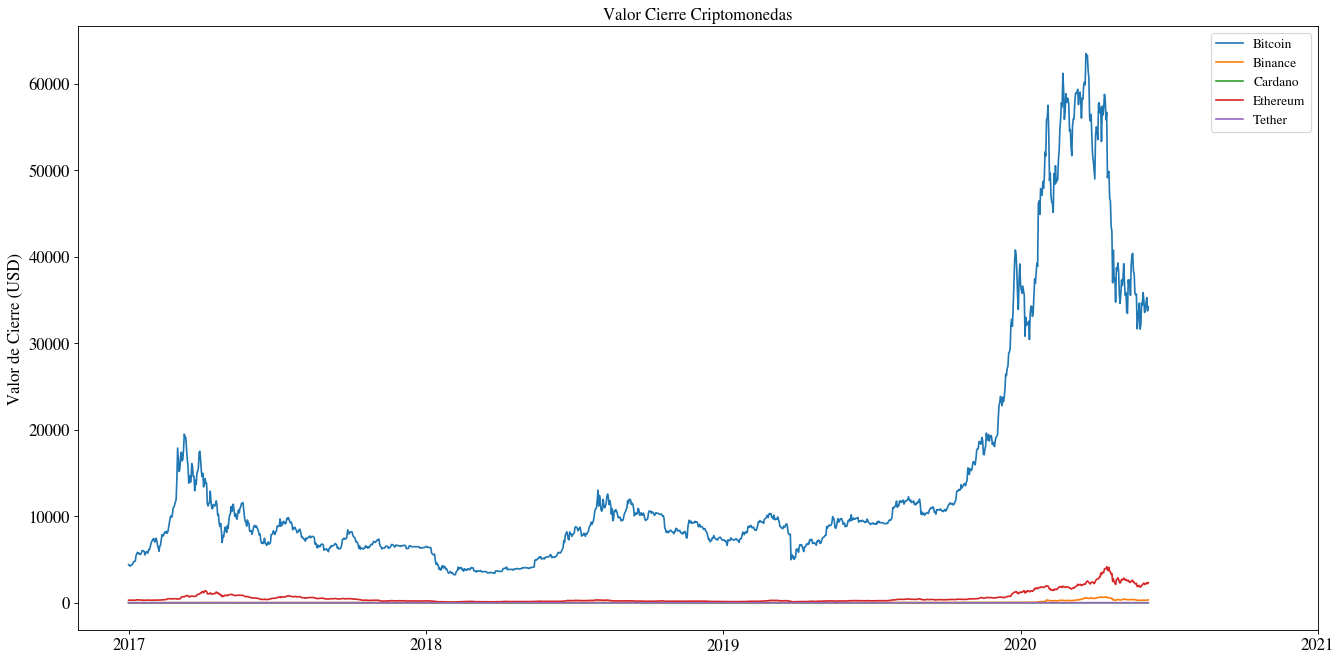

In [17]:
figure(figsize=(20, 10), dpi=80)
bitcoinplt, = plt.plot(df_Coins_Close.index,df_Coins_Close.bitcoinClose,label="Bitcoin")
binanceClose, = plt.plot(df_Coins_Close.index,df_Coins_Close.binanceClose,label="Binance")
cardanoClose, = plt.plot(df_Coins_Close.index,df_Coins_Close.cardanoClose,label="Cardano")
ethereumClose, = plt.plot(df_Coins_Close.index,df_Coins_Close.ethereumClose,label="Ethereum")
tetherClose, = plt.plot(df_Coins_Close.index,df_Coins_Close.tetherClose,label="Tether")
plt.title("Valor Cierre Criptomonedas", fontsize=15)
plt.xlabel("", fontsize=15)
plt.ylabel("Valor de Cierre (USD)", fontsize=15) 
plt.xticks(range(1,2000,400), ['2017','2018','2019','2020','2021'], fontsize=15)
plt.yticks(fontsize=15)
plt.legend(handles=[bitcoinplt, binanceClose, cardanoClose,ethereumClose,tetherClose], fontsize=12)
plt.savefig("time-series-tendency-Log-AllCoins.jpg", bbox_inches='tight')
plt.show()

# **Transformaciones**

### **Validación rango de fechas**

In [18]:
df_Coins_Close.head()

,bitcoinClose,binanceClose,cardanoClose,ethereumClose,tetherClose
Date,,,,,
2017-10-02,4409.319824,1.96467,0.025932,297.475006,1.00170
2017-10-03,4317.479980,1.82070,0.020816,292.463013,1.00012
2017-10-04,4229.359863,1.60148,0.021931,292.657990,1.00125
2017-10-05,4328.410156,1.67849,0.021489,295.863007,1.00030
2017-10-06,4370.810059,1.57991,0.018539,308.588013,1.00109


In [19]:
df_Coins_Close.tail()

,bitcoinClose,binanceClose,cardanoClose,ethereumClose,tetherClose
Date,,,,,
2021-07-02,33897.048590,287.423094,1.394397,2150.040364,1.000033
2021-07-03,34668.548402,298.237117,1.406836,2226.114282,0.999956
2021-07-04,35287.779766,307.732096,1.458184,2321.724112,0.999501
2021-07-05,33746.002456,302.377980,1.404898,2198.582464,1.000667
2021-07-06,34235.193451,320.934802,1.418053,2324.679449,1.000090


Se crea una copia del dataset para aplicar algunas transformaciones

In [20]:
df_Coins_Close_copy = df_Coins_Close.copy()
delete_df_idx=df_Coins_Close_copy[df_Coins_Close_copy.index<'2018-01-01'].index
df_Coins_Close_copy=df_Coins_Close_copy.drop(delete_df_idx)

### **Transformación de los datos a escala logaritmica**

Se aplica logaritmo en base 10 para visualizar mejor la tendencia de las criptomonedas

In [21]:
for key in df_Coins_Close_copy.columns:
  df_Coins_Close_copy[key] = df_Coins_Close_copy[key].apply(lambda x: np.log10(x))

In [22]:
df_Coins_Close_copy.head()

,bitcoinClose,binanceClose,cardanoClose,ethereumClose,tetherClose
Date,,,,,
2018-01-01,4.135362,0.925034,-0.137477,2.887978,0.003150
2018-01-02,4.175573,0.946343,-0.106467,2.946670,0.002123
2018-01-03,4.181872,0.979361,0.033287,2.983500,0.005798
2018-01-04,4.193102,0.964448,0.046932,2.991634,0.001097
2018-01-05,4.241285,1.173687,-0.000192,2.999009,-0.000594


## **Visualización tendencia criptomonedas en escala logaritmica**

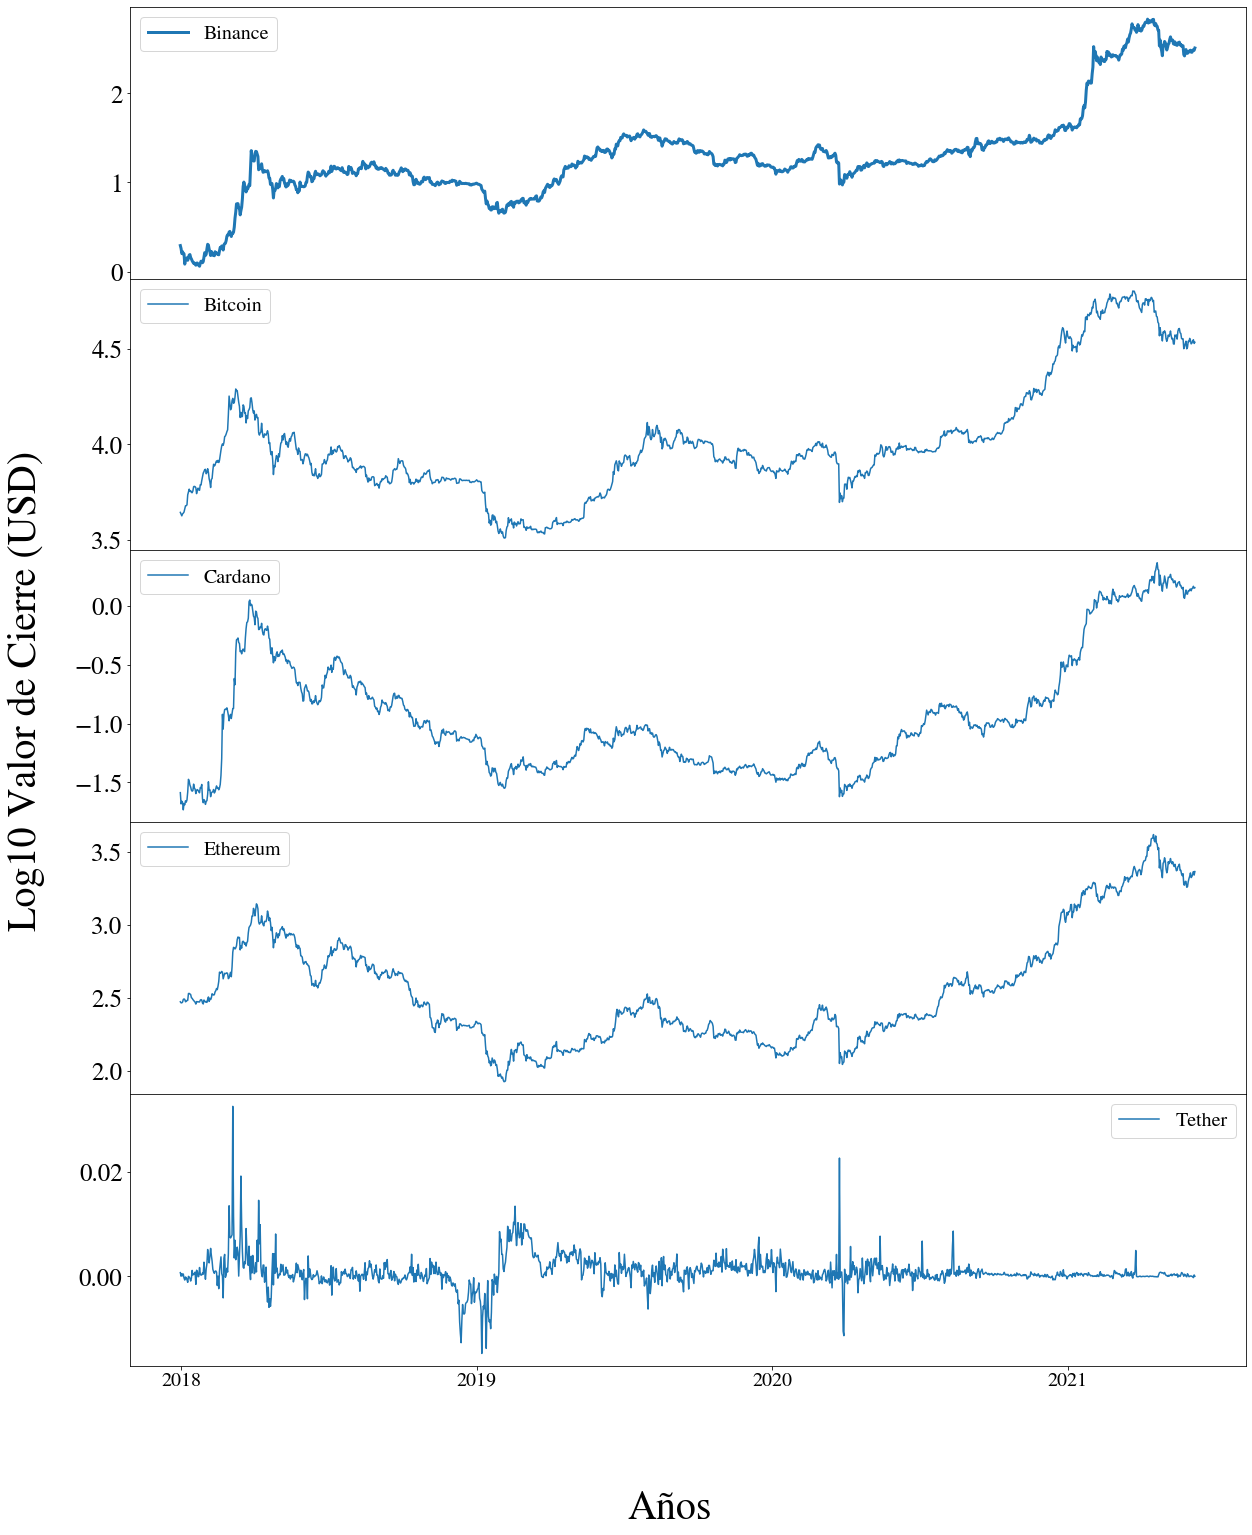

In [82]:
fig, ax = plt.subplots(5,1, figsize=(20,25), sharex=True)
fig.subplots_adjust(hspace=0)

ax[0].plot(df_Coins_Close_copy['binanceClose'], lw=3, label="Binance") 
ax[0].legend(fontsize=20)
ax[0].tick_params(labelsize=25)

ax[1].plot(df_Coins_Close_copy['bitcoinClose'], label="Bitcoin") 
ax[1].legend(fontsize=20)
ax[1].tick_params(labelsize=25)

ax[2].plot(df_Coins_Close_copy['cardanoClose'], label="Cardano") 
ax[2].legend(fontsize=20)
ax[2].tick_params(labelsize=25)

ax[3].plot(df_Coins_Close_copy['ethereumClose'], label="Ethereum") 
ax[3].legend(fontsize=20)
ax[3].tick_params(labelsize=25)

ax[4].plot(df_Coins_Close_copy['tetherClose'], label="Tether") 
ax[4].legend(fontsize=20)
ax[4].tick_params(labelsize=25)

fig.text(0.5, 0.04, 'Años', ha='center',fontsize=40)
fig.text(0.04, 0.5, 'Log10 Valor de Cierre (USD)', va='center', rotation='vertical', fontsize=40)

plt.xticks(range(1,1600,400), ['2018','2019','2020','2021'], fontsize=20)

plt.savefig("time-series-tendency.jpg", bbox_inches='tight')
plt.show()


# **Toma de decisión Móneda bitcoin**

## **Visualización dataset Bitcoin**

In [24]:
bitcoin.head(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
7,8,Bitcoin,BTC,2013-05-06 23:59:59,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09
8,9,Bitcoin,BTC,2013-05-07 23:59:59,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09
9,10,Bitcoin,BTC,2013-05-08 23:59:59,115.779999,109.599998,109.599998,113.566002,0.0,1.264049e+09


In [25]:
bitcoin.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


Se verifica que no existan datos nulos

In [26]:
bitcoin[bitcoin.isna() == True]

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se decide tomar como punto de referencia el bitcoin para nuestro análisis por su presencia en el mercado por más tiempo, porque tienen unas variaciones en su precio más altas.

### **Selección de la característica de Close e indexación**

In [27]:
bitcoinClose_Date = bitcoin[["Date","Close"]]
bitcoinClose_Date.head()

,Date,Close
0,2013-04-29 23:59:59,144.539993
1,2013-04-30 23:59:59,139.000000
2,2013-05-01 23:59:59,116.989998
3,2013-05-02 23:59:59,105.209999
4,2013-05-03 23:59:59,97.750000


Se le da formato a la fecha, especificando que es d/m/a 

In [28]:
bitcoinClose = bitcoinClose_Date.copy()
bitcoinClose['Date'] = pd.to_datetime(bitcoinClose['Date']).values
bitcoinClose['Date'] = bitcoinClose['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
bitcoinClose.Date = pd.to_datetime(bitcoinClose.Date, dayfirst = True)

se indexa la fecha

In [29]:
bitcoinClose.set_index("Date", inplace=True)

Se hace una análisis estadístico sobre la serie de tiempo

In [30]:
bitcoinClose.describe()

,Close
count,2991.000000
mean,6711.290443
std,11298.141921
min,68.431000
25%,430.569489
50%,2286.409912
75%,8576.238715
max,63503.457930


visualización del Dataframe

In [31]:
bitcoinClose.head()

,Close
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000


# **Evaluación de las caracterísiticas principales de la serie de tiempo**

**Estacionalidad**: Para este caso usaremos una prueba de hipotesis que nos permita definir si el valor de Cierre de la criptomoneda de bitcoin es estacionaria.
- Ho: La serie de tiempo no es estacionaria
- H1: La serie de tiempo es estacionaria

Para esta caso tomaremos el nivel de significancia del 5%

In [32]:
sts.adfuller(bitcoinClose.Close)

(-0.7973098451195602,
 0.8199110033239154,
 29,
 2961,
 {'1%': -3.4325603944919445,
  '10%': -2.567289874591689,
  '5%': -2.8625166073924957},
 45929.032374699236)

- valor estadístico de contraste: -0.89467
- p-value: 0.78

Dados los resultados podemos concluir que aceptamos la hipotesis nula, ya que el valor estadistico, toma un valor superiores al dado en el nivel de significancia, que corresponde a -2.567289874591689; adicionalmente, para el p-value este es un valor superior al nivel de significancia. Por lo tanto los datos no tienen un comportamiento estacionario.




**Estacionariedad**:

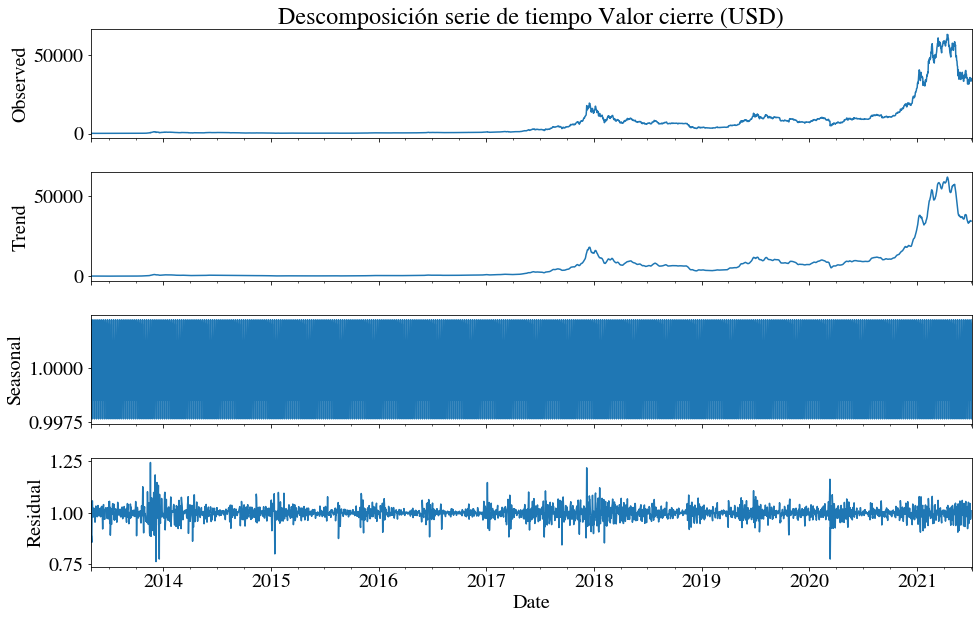

In [33]:
def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    

res = sm.tsa.seasonal_decompose(bitcoinClose.Close,  model = "multiplicative")

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(14, 9))
axes[0].set_title("Descomposición serie de tiempo Valor cierre (USD)")
plotseasonal(res, axes[:])
plt.savefig("seasonal_decompose_bitcoint.jpg", bbox_inches='tight')

plt.tight_layout()
plt.show()


Dada la naturaleza del movimiento del precio del bitcoin, tampoco se observa una tendencia ciclíca en su comportamiento. Se aplicará la función logaritmica a los datos, debido a la naturaleza de los mismos, esto con el fin de suavizar la curva y poder evidenciar los datos que tienen un valor más pequeño con relación a los más grandes, identificando su tendencia.

### Visualización logaritmo10 en la descomposición de la serie

In [34]:
bitcoinClose_log10 = bitcoinClose.apply(lambda x: np.log10(x))

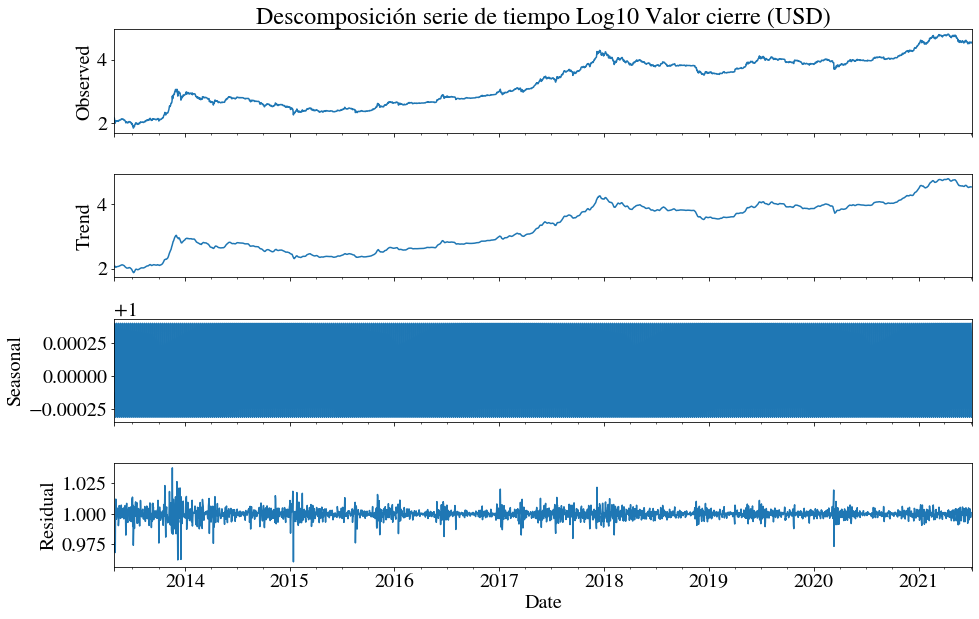

In [35]:
plt.rcParams['figure.figsize'] = (14, 9)

res = sm.tsa.seasonal_decompose(bitcoinClose_log10.Close,  model = "multiplicative")
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(14, 9))
axes
axes[0].set_title("Descomposición serie de tiempo Log10 Valor cierre (USD)")
plotseasonal(res, axes[:])
plt.savefig("seasonal_decompose_bitcoinClose_log10.jpg", bbox_inches='tight')

plt.tight_layout()
plt.show()


In [81]:
sts.adfuller(bitcoinClose_log10.Close)

(-0.7766926675665754,
 0.8258727405184388,
 23,
 2967,
 {'1%': -3.432555920657187,
  '10%': -2.5672888226314647,
  '5%': -2.8625146314725565},
 -15243.21460954964)

Al aplicar nuevamente la prueba, notamos que aún el valor 
estadística apesar de aplicar el logaritmo, es mayor que el esperado y por tal motivo se tomaría nuevamente la hipotesis nulas: Que la serie es no estacionaria. Se aplicará la primera derivada para buscar que la tendencia se aplane un poco

Luego de aplicar el logatimo natural en base 10, se observa que el comportamieno de los datos si podría tener una tendencia, ya qué por medio de la grafica *Residual* se notan unos picos que están al rededor del inicio del año, y estos picos con relación a la grafica de tendencia, nos muestra leves varciaciones en la subida o bajada del precio.

Se aplica la media móvil y la desviación estándar para validar el comportamiento de las tendencias

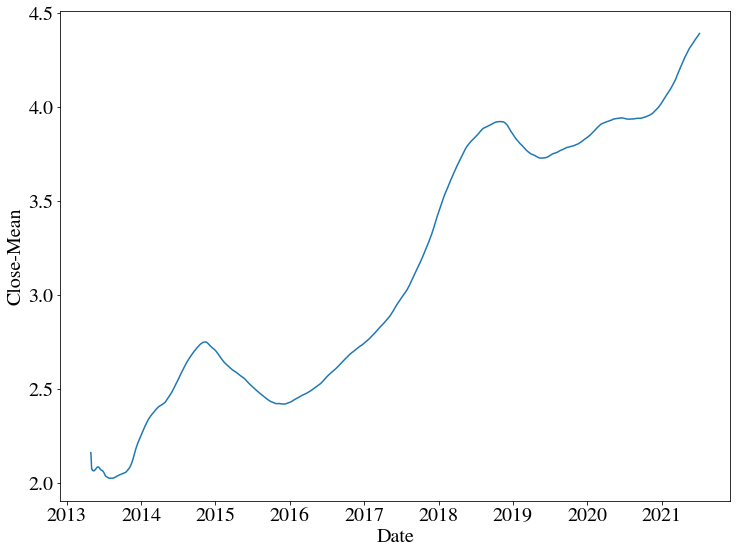

In [36]:
bitcoinClose_mean = bitcoinClose_log10.rolling(window = 365, min_periods=1).mean() # Media movil 

fig = plt.figure(figsize=(12,9))
plt.plot(bitcoinClose_mean.index,bitcoinClose_mean.values)
plt.xlabel('Date')
plt.ylabel('Close-Mean')
plt.show()

visualización desviación Estándar a los datos log10

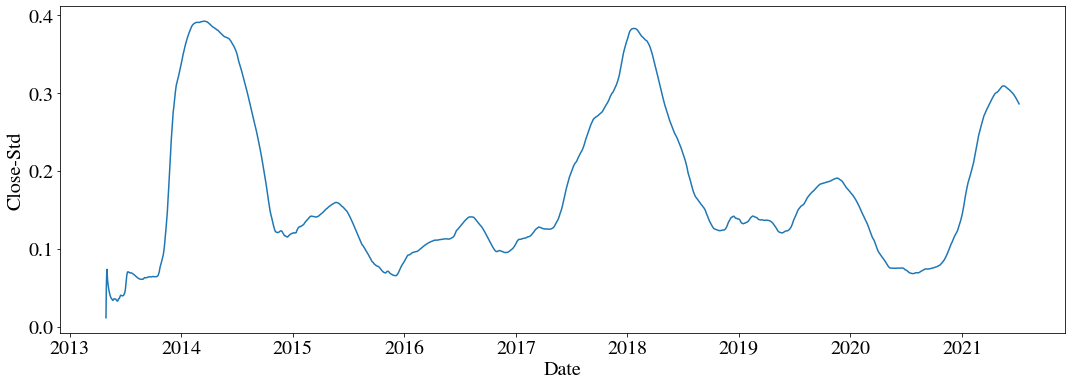

In [37]:
bitcoinClose_std = bitcoinClose_log10.rolling(window = 365, min_periods=1).std() # Media movil 

fig = plt.figure(figsize=(18,6))
plt.plot(bitcoinClose_std.index,bitcoinClose_std.values)
plt.xlabel('Date')
plt.ylabel('Close-Std')
plt.show()

### **Valor diferencial aplicado a la serie en log10**

In [38]:
bitcoinLog10_diff = bitcoinClose_log10.Close.diff(365).dropna()

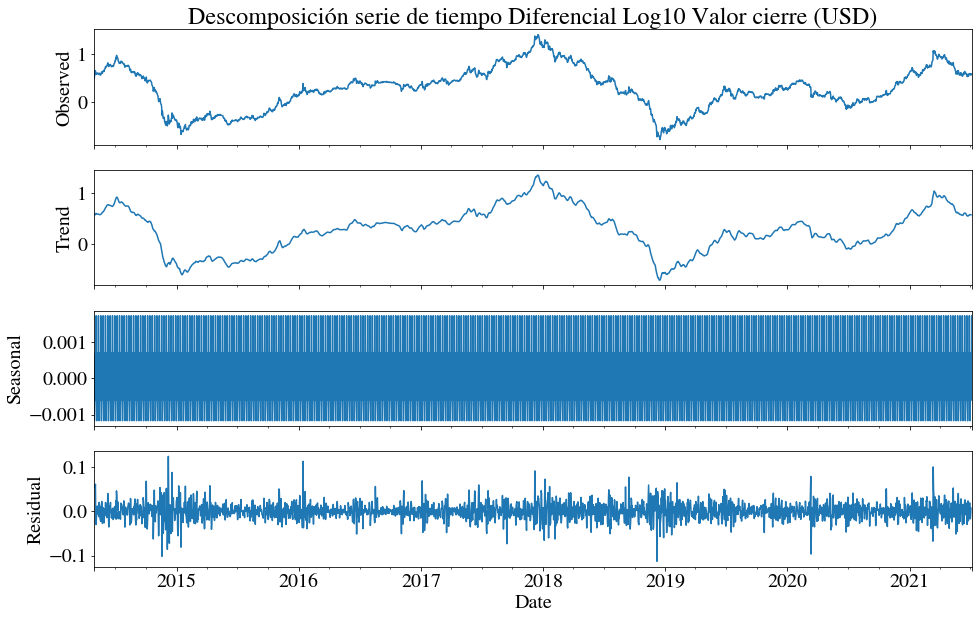

In [39]:
plt.rcParams['figure.figsize'] = (14, 9)


res = sm.tsa.seasonal_decompose(bitcoinLog10_diff,  model = "additive")
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(14, 9))

axes[0].set_title("Descomposición serie de tiempo Diferencial Log10 Valor cierre (USD)")
plotseasonal(res, axes[:])
plt.savefig("seasonal_decompose_bitcoinLog10_diff.jpg", bbox_inches='tight')

plt.tight_layout()
plt.show()

Apartir de estas transformación evidenciamos una mejora en la tendencia y un suavizado en la serie de tiempo, donde se puede evidenciar una posible estacionalidad, por lo tanto aplicaremos de nuevo la prueba de Dickey-Fuller

In [40]:
sts.adfuller(bitcoinLog10_diff)

(-1.9276849881256344,
 0.31915137055360887,
 23,
 2602,
 {'1%': -3.43286566599684,
  '10%': -2.5673616524036085,
  '5%': -2.862651427026831},
 -11728.1794115092)

Al aplicar nuevamente la prueba, notamos que aún el valor 
estadística es mayor que el esperado y por tal motivo se tomaría nuevamente la hipotesis nulas: Que la serie es no estacionaria. Se aplicará la primera derivada para buscar que la tendencia se aplane un poco

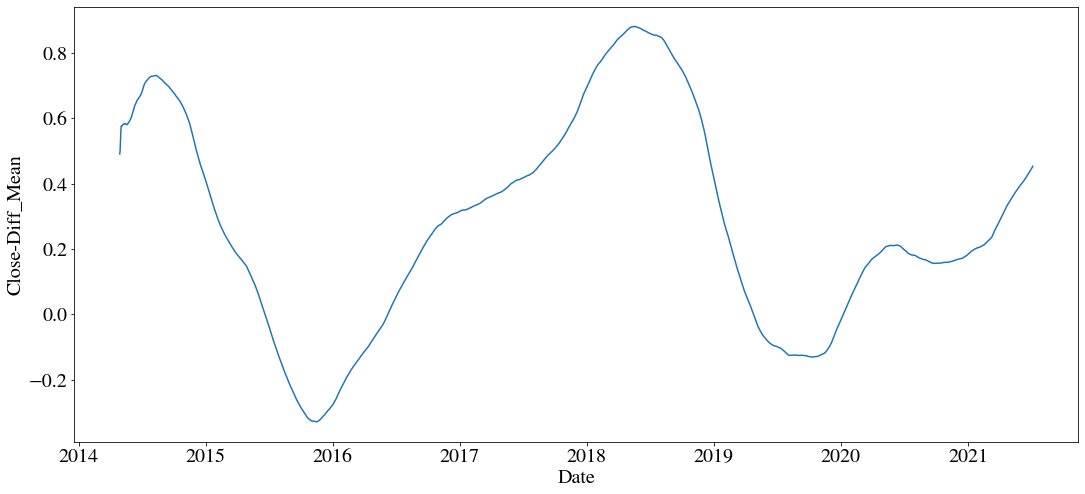

In [41]:
bitcoinClose_diff_mean = bitcoinLog10_diff.rolling(window = 365, min_periods=1).mean() # Media movil 

fig = plt.figure(figsize=(18,8))
plt.plot(bitcoinClose_diff_mean.index,bitcoinClose_diff_mean.values)
plt.xlabel('Date')
plt.ylabel('Close-Diff_Mean')
plt.show()

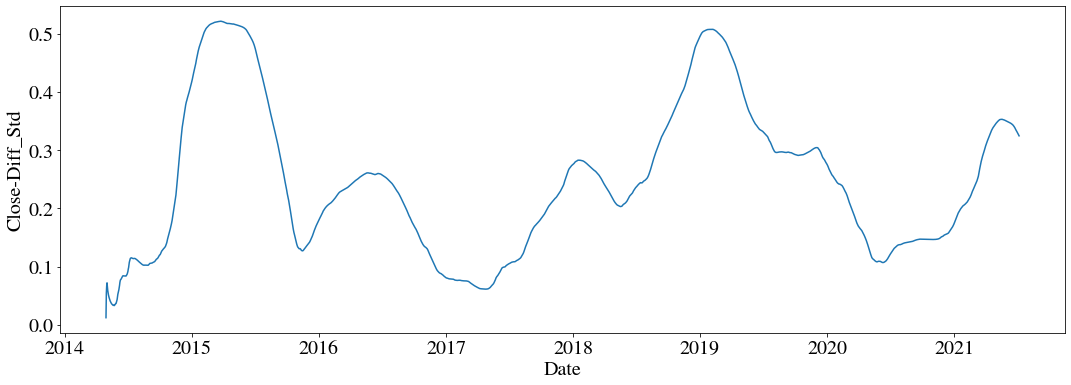

In [42]:
bitcoinClose_diff_std = bitcoinLog10_diff.rolling(window = 365, min_periods=1).std() # Media movil 

fig = plt.figure(figsize=(18,6))
plt.plot(bitcoinClose_diff_std.index,bitcoinClose_diff_std.values)
plt.xlabel('Date')
plt.ylabel('Close-Diff_Std')
plt.show()

### **Se aplica un nuevo diferencial a la serie**

In [43]:
bitcoinClose_ajustado_diff = pd.Series(np.diff(bitcoinLog10_diff))

In [44]:
sts.adfuller(bitcoinClose_ajustado_diff)

(-9.638621656416177,
 1.542259501269276e-16,
 22,
 2602,
 {'1%': -3.43286566599684,
  '10%': -2.5673616524036085,
  '5%': -2.862651427026831},
 -11720.942789382794)

finalmente al realizar la derivada notamos que los valores para el valor estadístico y el valor p-value son los esperados para tomar nuestra hipótesis alternativa: La serie es estacionaria
- Valor estadístico -9.638621 <  -2.8626
- Valor-p 1.542e-16 < 0.05

Ahora aplicaremos la media móvil a los datos que tenemos para mirar su comportamiento

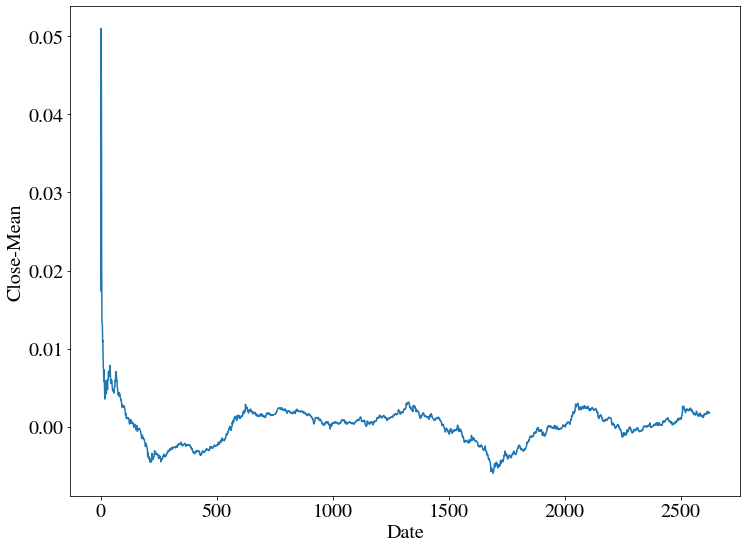

In [45]:
bitcoinClose_ajustado_mean = bitcoinClose_ajustado_diff.rolling(window = 365, min_periods=1).mean() # Media movil 

fig = plt.figure(figsize=(12,9))
plt.plot(bitcoinClose_ajustado_mean.index,bitcoinClose_ajustado_mean.values)
plt.xlabel('Date')
plt.ylabel('Close-Mean')
plt.savefig("bitcoinClose_ajustado_diff_media.jpg", bbox_inches='tight')
plt.show()

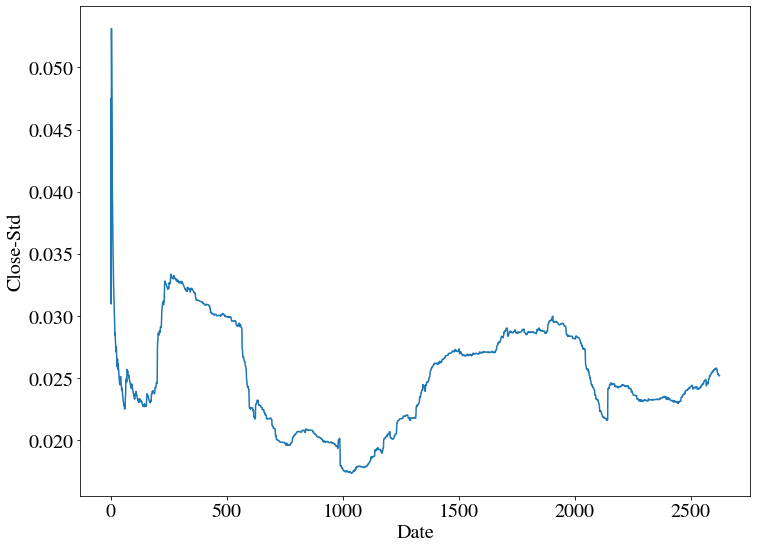

In [46]:
bitcoinClose_ajustado_std = bitcoinClose_ajustado_diff.rolling(window = 365, min_periods=1).std() # Media movil 

fig = plt.figure(figsize=(12,9))
plt.plot(bitcoinClose_ajustado_std.index,bitcoinClose_ajustado_std.values)
plt.xlabel('Date')
plt.ylabel('Close-Std')
plt.savefig("bitcoinClose_ajustado_diff_Std.jpg", bbox_inches='tight')
plt.show()

Al aplicar estas ultimas transformaciones observamos que si bien el test de Dick-fuller se cumple, la serie de tiempo pierde características importantes, de su comportamiento, como lo son los picos de las curvas, es decir se suaviza tanto la curva que indica que se pierde información de interes para los futuros modelos.

# **Generación de Modelos**

## **Normalización de los Datos**

aplicamos la ténica de normalización de los datos, por medio del método de MinMax, con el objetivo de evitar datos que queden muy dispersos entre sí y genere sesgos en el análisis.

In [47]:
MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
bitcoinClose_Norm = MinMax_1.fit_transform(bitcoinClose_ajustado_diff.values.reshape(-1,1)) # Transformación de los nuevos datos con una escala MinMax
bitcoinClose_Norm = pd.DataFrame(data = bitcoinClose_Norm, columns = ['Close'], index = bitcoinClose_ajustado_diff.index )

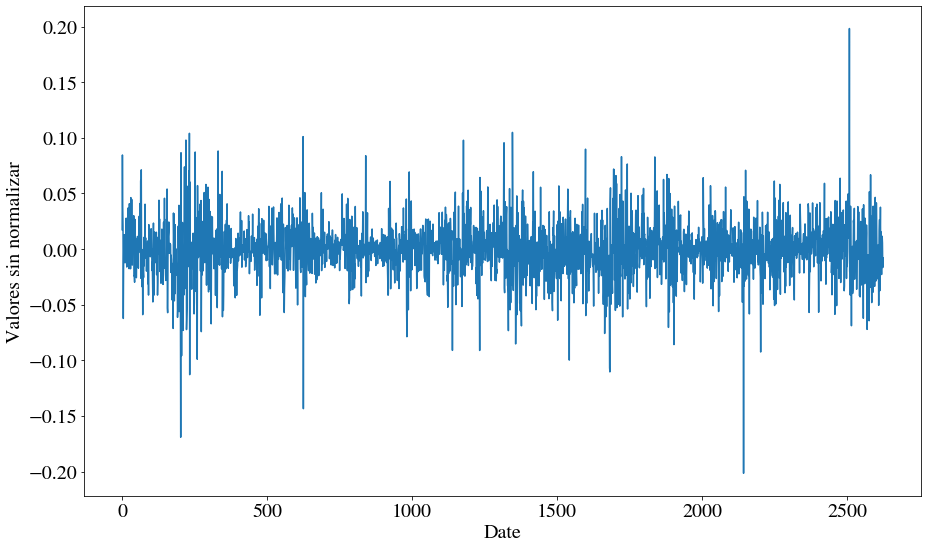

In [48]:
fig = plt.figure(figsize=(15,9))
plt.plot(bitcoinClose_ajustado_diff.index, bitcoinClose_ajustado_diff.values)
plt.xlabel('Date')
plt.ylabel('Valores sin normalizar')
plt.savefig("bitcoinClose_ajustado_Sin_Normalizar.jpg", bbox_inches='tight')
plt.show()

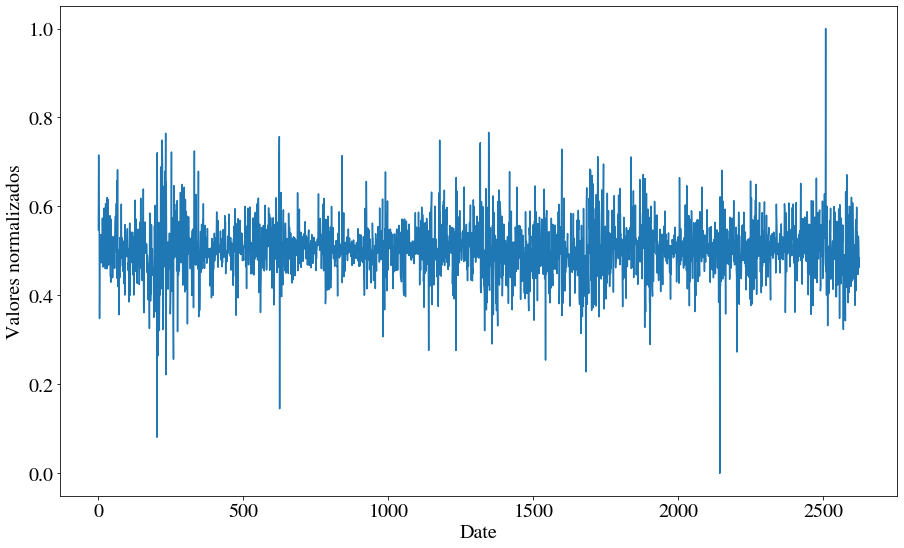

In [49]:
fig = plt.figure(figsize=(15,9))
plt.plot(bitcoinClose_Norm.index, bitcoinClose_Norm.values)
plt.xlabel('Date')
plt.ylabel('Valores normalizados')
plt.savefig("bitcoinClose_ajustado_Normalizados.jpg", bbox_inches='tight')
plt.show()

Luego de esto se identifica que la normalización no aporta ningún valor adicional y se seguirá trabajando con los datos anteriores

## **Función de autocorrelación**

Se calcula la función de autocorrelación para identificar una posible estacionalidad de los datos, validando su similitud entre los valores pasados, de esta manera hallar un valor de retraso, que nos ayude a identificar la cantidad de valores minimos con alguna tendencia.

Se calcula con la serie de tiempo diferencial ajustada.

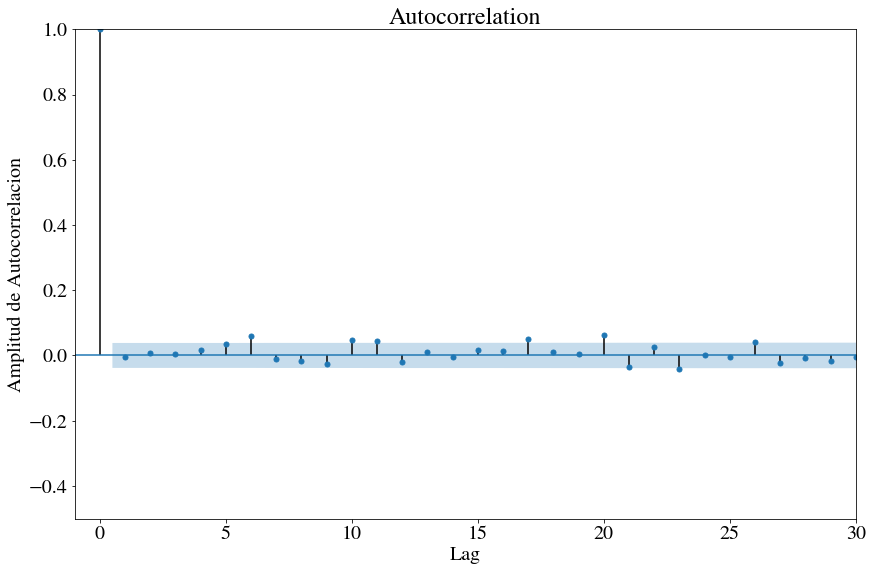

In [50]:
sm.graphics.tsa.plot_acf(bitcoinClose_ajustado_diff, lags=60)
plt.ylabel("Amplitud de Autocorrelacion", size = 20,)
plt.xlabel("Lag", size = 20)
plt.xlim(-1,30)
plt.ylim(-0.5,1)
plt.savefig("autocorrelacion.jpg", bbox_inches='tight')

## **Modelo Arima**

Para este caso se toma el dataframe df_coins_Close que anteriormente se había calculado, desde el cual se tomará el valor de cierre del bitcoin como variable objetivo.

In [51]:
df_Coins_Close_copy = df_Coins_Close.copy()

In [52]:
for nombres in df_Coins_Close_copy.columns:
  df_Coins_Close_copy[nombres] = df_Coins_Close_copy[nombres].apply(lambda x: np.log10(x))

Dado el método cientifico se selecciona un orden de ARIMA(2,2,1) para el modelo.

### **Creación conjunto de datos**

In [53]:
size = int(len(df_Coins_Close_copy)*0.8)
df_train, df_test = df_Coins_Close_copy.iloc[:size], df_Coins_Close_copy.iloc[size:]

### **Entrenamiento del modelo Arima**

In [54]:
model_ARIMA = ARIMA(df_train['bitcoinClose'], order=(1,0,1), freq = 'D')
model_ARIMA_fit = model_ARIMA.fit(start_ar_lags=30)
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           bitcoinClose   No. Observations:                 1099
Model:                     ARMA(1, 1)   Log Likelihood                2836.570
Method:                       css-mle   S.D. of innovations              0.018
Date:                Sun, 05 Jun 2022   AIC                          -5665.140
Time:                        04:45:36   BIC                          -5645.131
Sample:                    10-02-2017   HQIC                         -5657.570
                         - 10-04-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.8720      0.076     50.991      0.000       3.723       4.021
ar.L1.bitcoinClose     0.9937      0.003    302.427      0.000       0.987       1.000
ma.L1.bitcoinClose    -0.0222      0.029     -0.773      0.440      -0.079       0.034
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0063           +0.0000j            1.0063            0.0000
MA.1           45.0562           +0.0000j           45.0562            0.0000
-----------------------------------------------------------------------------
"""

### **Predict modelo Arima**

In [55]:
df_test.index.min(), df_test.index.max()

('2020-10-05', '2021-07-06')

In [56]:
start_date = "'2020-10-05'"
end_date = "2021-07-06"

test_Arima = model_ARIMA_fit.predict(start=start_date, end=end_date, dynamic=False)

df_test_Arima = pd.DataFrame(test_Arima.values, index = df_test[start_date:end_date].index)

In [57]:
df_train.index.min(), df_train.index.max()

('2017-10-02', '2020-10-04')

In [58]:
start_date = "2017-10-02"
end_date = "2020-10-04"

train_Arima = model_ARIMA_fit.predict(start=start_date, end=end_date, dynamic=False)

df_train_Arima = pd.DataFrame(train_Arima.values, index = df_train[start_date:end_date].index)

### **Métricas modelo ARIMA**

### **Train**

In [99]:
data_predict = df_train_Arima.values.reshape((-1))
data = df_train['bitcoinClose'].values

In [100]:
c = np.concatenate((data_predict.reshape(-1,1), data.reshape(-1,1)),axis=1)
df_error = pd.DataFrame(c, columns=['data_predict','data'])

df_error['Test_mregru'] =  df_error.apply(lambda x: mrea(x.data_predict, x.data), axis = 1)

mregru_arima = np.array(df_error.Test_mregru)

del df_error

In [101]:
mse_a = mean_squared_error(df_train['bitcoinClose'].values, df_train_Arima.values) 
mae_a = mean_absolute_error(df_train['bitcoinClose'].values, df_train_Arima.values)
print('Test Score: %.2f MSE' % (mse_a))
print('Test Score: %.2f MAE' % (mae_a))
print('Train Score: %.2f MREA' % (np.average(mregru_arima)))

Test Score: 0.00 MSE
Test Score: 0.01 MAE
Train Score: 0.00 MREA


### **Visualización Train Vs Predict**

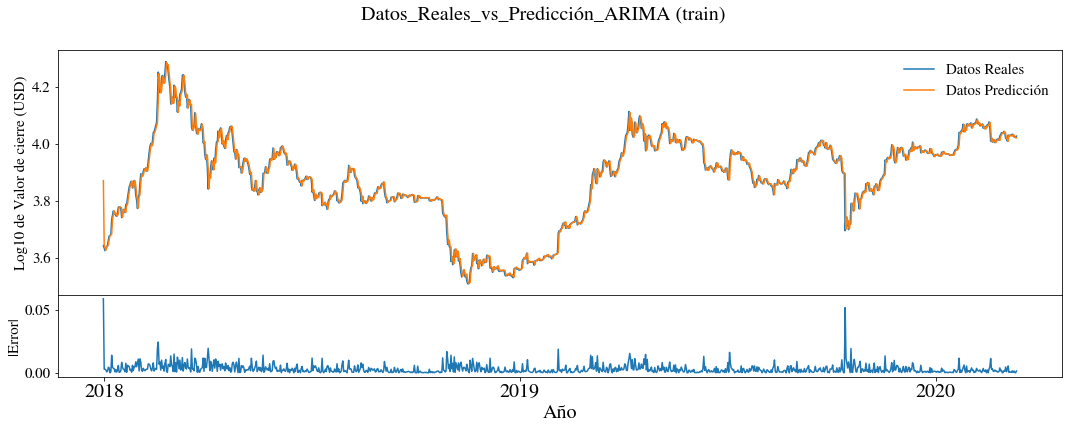

In [102]:
fig, ax = plt.subplots(2,1, figsize=(18,6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0)

ax[0].plot(df_train['bitcoinClose'],label = 'Datos Reales')
ax[0].plot(df_train_Arima,label = 'Datos Predicción')

ax[0].legend(loc='upper right', fontsize=15,frameon=False)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_ylabel("Log10 de Valor de cierre (USD)", size = 15)

ax[1].plot(mregru_arima)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_ylabel("|Error|", size = 15)

plt.xticks(range(1,1500,500), ['2018','2019','2020'], fontsize=20)
plt.xlabel("Año", size = 20)

fig.suptitle("Datos_Reales_vs_Predicción_ARIMA (train)", fontsize=20)
plt.savefig("Datos_Reales_vs_Predicción_ARIMA_train.jpg", bbox_inches='tight')
plt.show()

### **Test**

In [63]:
data_predict = df_test_Arima.values.reshape((-1))
data = df_test['bitcoinClose'].values

In [64]:
c = np.concatenate((data_predict.reshape(-1,1), data.reshape(-1,1)),axis=1)
df_error = pd.DataFrame(c, columns=['data_predict','data'])

df_error['Test_mregru'] =  df_error.apply(lambda x: mrea(x.data_predict, x.data), axis = 1)

mregru_arima = np.array(df_error.Test_mregru)

del df_error

In [65]:
mse_a = mean_squared_error(df_test['bitcoinClose'].values, df_test_Arima.values) 
mae_a = mean_absolute_error(df_test['bitcoinClose'].values, df_test_Arima.values)
print('Test Score: %.2f MSE' % (mse_a))
print('Test Score: %.2f MAE' % (mae_a))
print('Train Score: %.2f MREA' % (np.average(mregru_arima)))

Test Score: 0.38 MSE
Test Score: 0.56 MAE
Train Score: 0.14 MREA


### Visualización test Vs Predict

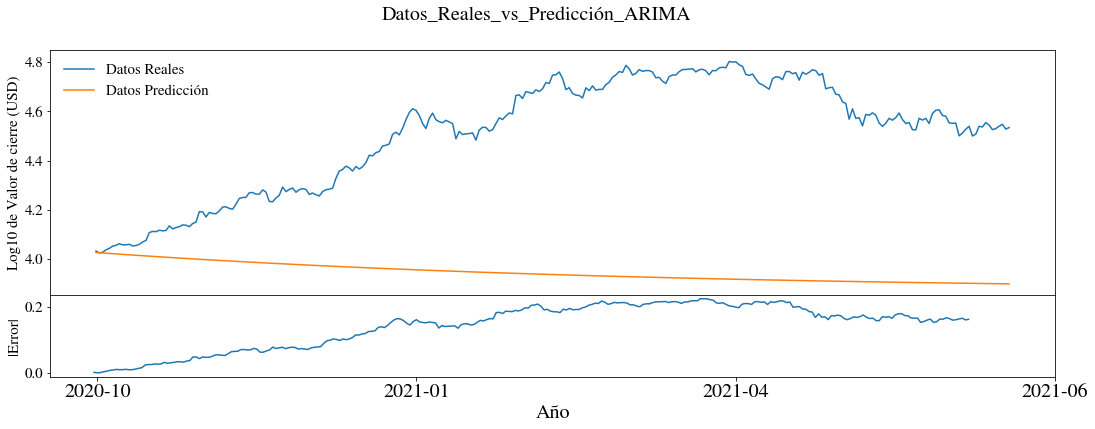

In [66]:
fig, ax = plt.subplots(2,1, figsize=(18,6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0)

ax[0].plot(df_test['bitcoinClose'],label = 'Datos Reales')
ax[0].plot(df_test_Arima,label = 'Datos Predicción')

ax[0].legend(loc='upper left', fontsize=15,frameon=False)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_ylabel("Log10 de Valor de cierre (USD)", size = 15)

ax[1].plot(mregru_arima)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_ylabel("|Error|", size = 15)

plt.xticks(range(1,400,100), ['2020-10','2021-01','2021-04','2021-06'], fontsize=20)
plt.xlabel("Año", size = 20)

fig.suptitle("Datos_Reales_vs_Predicción_ARIMA", fontsize=20)
plt.savefig("Datos_Reales_vs_Predicción_ARIMA.jpg", bbox_inches='tight')
plt.show()

## **Modelo Arimax**

### **Entrenamiento del modelo ARIMAX**

Para este caso se toma el dataframe df_coins_Close que anteriormente se había calculado, desde el cual se tomarán los valores de los otros campos para considerarlos como variables exógenas, las cuales son usadas como valores de referencia que afectarían el comportamiento de nuestra variable objetivo, esta decisión se toma dado que en la sección de visualizaciñon de criptomonedas se evidencia que todas ellas comparten una tendencia similiar, excepto Tether que tiene un comportamiento muy "ruidoso" por lo que se decide no usarla.

Usamos como varaibles exógenas el valor de Cierre de las otras criptomonedas

In [67]:
model_ARIMAX = ARIMA(df_train['bitcoinClose'], exog = df_train[['binanceClose', 'cardanoClose','ethereumClose']], order=(1,0,2), freq = 'D')
model_ARIMAX_fit = model_ARIMAX.fit(start_ar_lags=30)
model_ARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           bitcoinClose   No. Observations:                 1099
Model:                     ARMA(1, 2)   Log Likelihood                3388.466
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sun, 05 Jun 2022   AIC                          -6760.931
Time:                        04:45:39   BIC                          -6720.914
Sample:                    10-02-2017   HQIC                         -6745.792
                         - 10-04-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6367      0.080     33.001      0.000       2.480       2.793
binanceClose           0.1751      0.017     10.604      0.000       0.143       0.207
cardanoClose           0.0469      0.014      3.405      0.001       0.020       0.074
ethereumClose          0.4526      0.022     20.140      0.000       0.409       0.497
ar.L1.bitcoinClose     0.9937      0.003    322.385      0.000       0.988       1.000
ma.L1.bitcoinClose     0.1341      0.031      4.370      0.000       0.074       0.194
ma.L2.bitcoinClose    -0.0176      0.030     -0.592      0.554      -0.076       0.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0063           +0.0000j            1.0063            0.0000
MA.1           -4.6320           +0.0000j            4.6320            0.5000
MA.2           12.2319           +0.0000j           12.2319            0.0000
-----------------------------------------------------------------------------
"""

### **Predict modelo Arimax**


In [68]:
df_test.index.min(), df_test.index.max()

('2020-10-05', '2021-07-06')

In [69]:
start_date = "'2020-10-05'"
end_date = "2021-07-06"

test_Arimax = model_ARIMAX_fit.predict(start=start_date, end=end_date,exog=df_test[['binanceClose', 'cardanoClose','ethereumClose']], dynamic=False)

df_test_Arimax = pd.DataFrame(test_Arimax.values, index = df_test[start_date:end_date].index)

In [70]:
df_train.index.min(), df_train.index.max()

('2017-10-02', '2020-10-04')

In [71]:
start_date = "2017-10-02"
end_date = "2020-10-04"

train_Arimax = model_ARIMA_fit.predict(start=start_date, end=end_date , exog=df_train[['binanceClose', 'cardanoClose','ethereumClose']], dynamic=False)

df_train_Arimax = pd.DataFrame(train_Arimax.values, index = df_train[start_date:end_date].index)

### **Train**

In [93]:
data_predict = df_train_Arimax.values.reshape((-1))
data = df_train['bitcoinClose'].values

In [94]:
c = np.concatenate((data_predict.reshape(-1,1), data.reshape(-1,1)),axis=1)
df_error = pd.DataFrame(c, columns=['data_predict','data'])

df_error['Test_mregru'] =  df_error.apply(lambda x: mrea(x.data_predict, x.data), axis = 1)

mregru_arima = np.array(df_error.Test_mregru)

del df_error

In [95]:
mse_a = mean_squared_error(df_train['bitcoinClose'].values, df_train_Arimax.values) 
mae_a = mean_absolute_error(df_train['bitcoinClose'].values, df_train_Arimax.values)
print('Test Score: %.2f MSE' % (mse_a))
print('Test Score: %.2f MAE' % (mae_a))
print('Train Score: %.2f MREA' % (np.average(mregru_arima)))

Test Score: 0.00 MSE
Test Score: 0.01 MAE
Train Score: 0.00 MREA


### **Visualización Train Vs Predict**

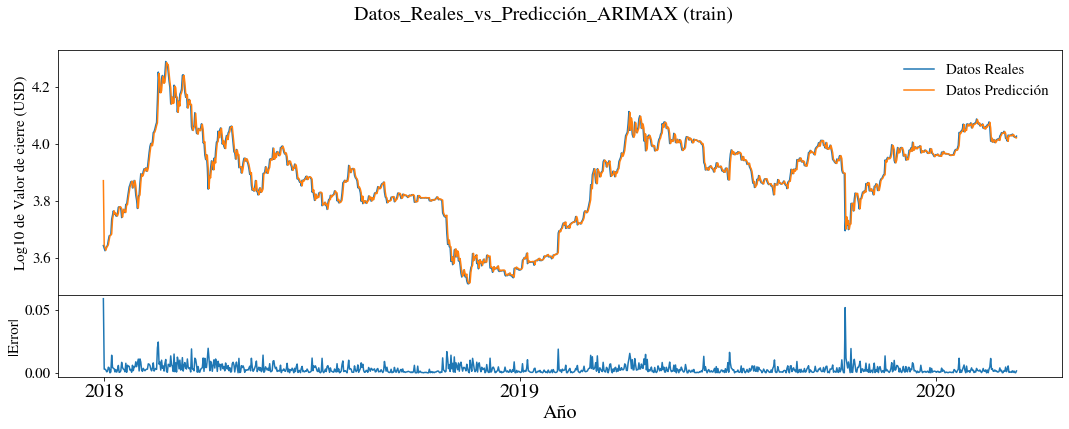

In [98]:
fig, ax = plt.subplots(2,1, figsize=(18,6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0)

ax[0].plot(df_train['bitcoinClose'],label = 'Datos Reales')
ax[0].plot(df_train_Arimax,label = 'Datos Predicción')

ax[0].legend(loc='upper right', fontsize=15,frameon=False)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_ylabel("Log10 de Valor de cierre (USD)", size = 15)

ax[1].plot(mregru_arima)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_ylabel("|Error|", size = 15)

plt.xticks(range(1,1500,500), ['2018','2019','2020'], fontsize=20)
plt.xlabel("Año", size = 20)

fig.suptitle("Datos_Reales_vs_Predicción_ARIMAX (train)", fontsize=20)
plt.savefig("Datos_Reales_vs_Predicción_ARIMAX_train.jpg", bbox_inches='tight')
plt.show()

### **Test**

In [76]:
data_predict = df_test_Arimax.values.reshape((-1))
data = df_test['bitcoinClose'].values

In [77]:
c = np.concatenate((data_predict.reshape(-1,1), data.reshape(-1,1)),axis=1)
df_error = pd.DataFrame(c, columns=['data_predict','data'])

df_error['Test_mregru'] =  df_error.apply(lambda x: mrea(x.data_predict, x.data), axis = 1)

mregru_arima = np.array(df_error.Test_mregru)

del df_error

In [78]:
mse_a = mean_squared_error(df_test['bitcoinClose'].values, df_test_Arimax.values) 
mae_a = mean_absolute_error(df_test['bitcoinClose'].values, df_test_Arimax.values)
print('Test Score: %.2f MSE' % (mse_a))
print('Test Score: %.2f MAE' % (mae_a))
print('Train Score: %.2f MREA' % (np.average(mregru_arima)))

Test Score: 0.02 MSE
Test Score: 0.13 MAE
Train Score: 0.03 MREA


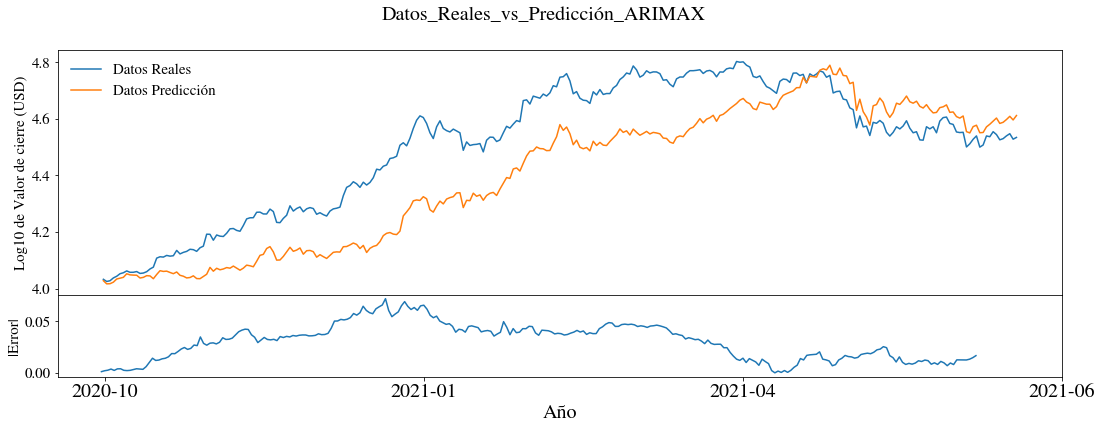

In [79]:
fig, ax = plt.subplots(2,1, figsize=(18,6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0)

ax[0].plot(df_test['bitcoinClose'],label = 'Datos Reales')
ax[0].plot(df_test_Arimax,label = 'Datos Predicción')

ax[0].legend(loc='upper left', fontsize=15,frameon=False)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_ylabel("Log10 de Valor de cierre (USD)", size = 15)

ax[1].plot(mregru_arima)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_ylabel("|Error|", size = 15)

plt.xticks(range(1,400,100), ['2020-10','2021-01','2021-04','2021-06'], fontsize=20)
plt.xlabel("Año", size = 20)

fig.suptitle("Datos_Reales_vs_Predicción_ARIMAX", fontsize=20)
plt.savefig("Datos_Reales_vs_Predicción_ARIMAX.jpg", bbox_inches='tight')
plt.show()